<a href="https://colab.research.google.com/github/necronomican/rasa_nlu/blob/master/Assignment_1A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")


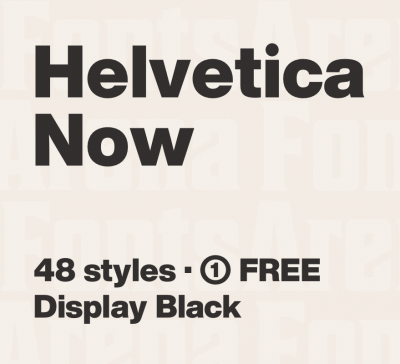

In [3]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)


In [0]:
kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
kernel_identity = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
kernel_45 = np.array([[-1, -1, 2], [-1,2,-1], [2, -1,-1]])
kernel_edge = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
kernel_blur = np.ones((3,3)) / 9
kernel_horizontal = np.array([[-1,-1,-1],[0,0,0], [1,1,1]])



---


# Sharpening kernel
---



For sharpening the image we use the [[0, -1, 0], [-1, 5, -1], [0, -1, 0]] kernel. As seen it enhances the pixel in middle of local-receptive field and makes it pop out thereby making it appear more enhanced in a way.


Text(0.5, 1.0, 'original')

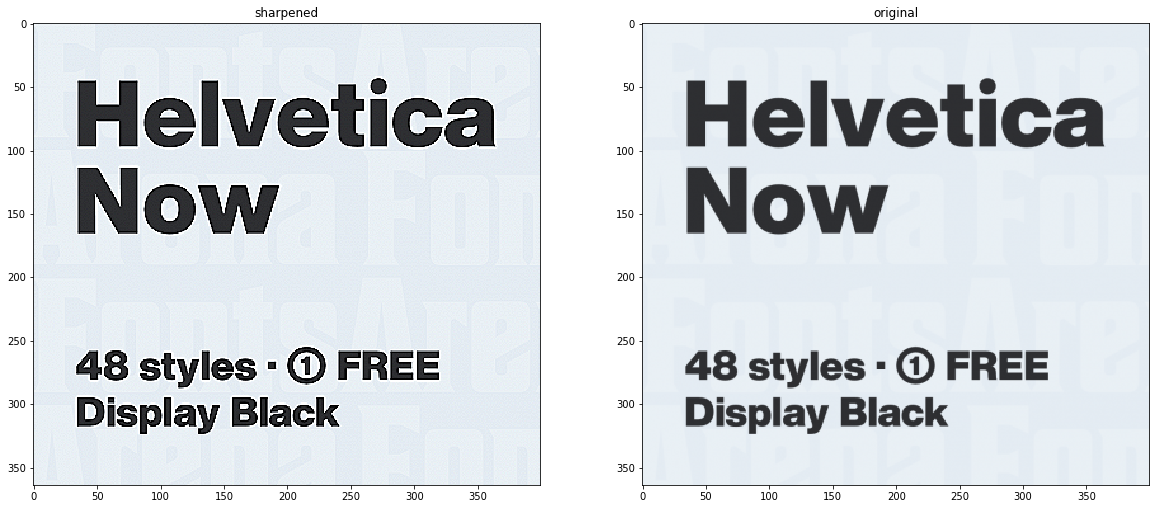

In [5]:
sharpened = cv2.filter2D(image, -1, kernel_sharpen)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,20))
ax1.imshow(sharpened)
ax1.set_title("sharpened")
ax2.imshow(image)
ax2.set_title("original")



---


# Horizonatl edge detection kernel
---

We use ** [[-1,-1,-1],[0,0,0], [1,1,1]]** for horizontal edge detection as it will make the color difference pop out more when we go from the darker to more bright area in the image. This usually denotes an edge.

Text(0.5, 1.0, 'original')

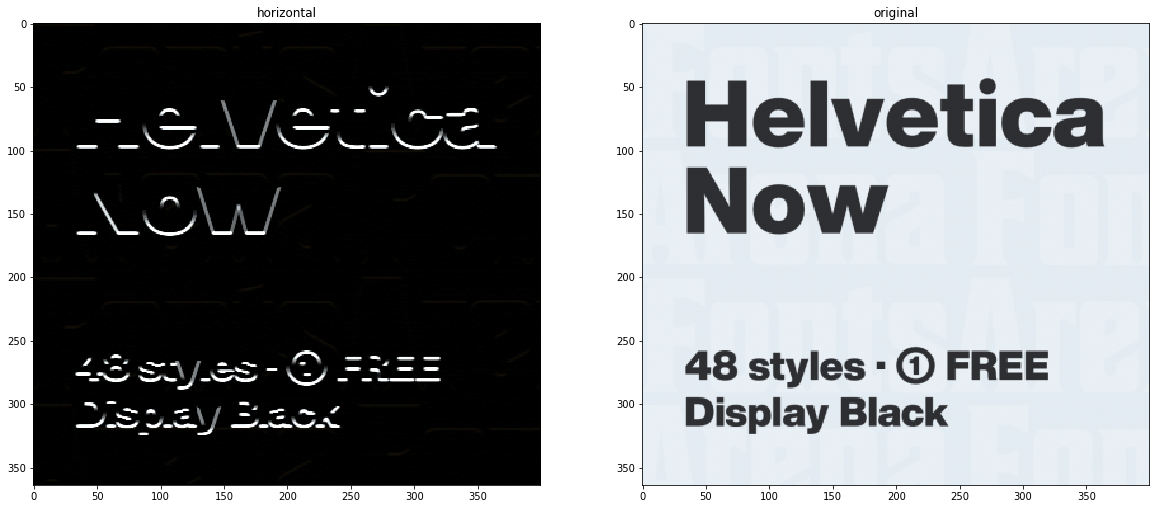

In [6]:
horizontal = cv2.filter2D(image, -1, kernel_horizontal)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,20))
ax1.imshow(horizontal)
ax1.set_title("horizontal")
ax2.imshow(image)
ax2.set_title("original")



---


# Blur Kenrel
---

We use **[[1/9, 1/9, 1/9], [1/9,1/9,1/9], [1/9,1/9,1/9]]** for blurring the image. The kernel brings information from all the neighbouring pixels giving a blurring effect. This is** used to reduce noise in the image.**

Text(0.5, 1.0, 'original')

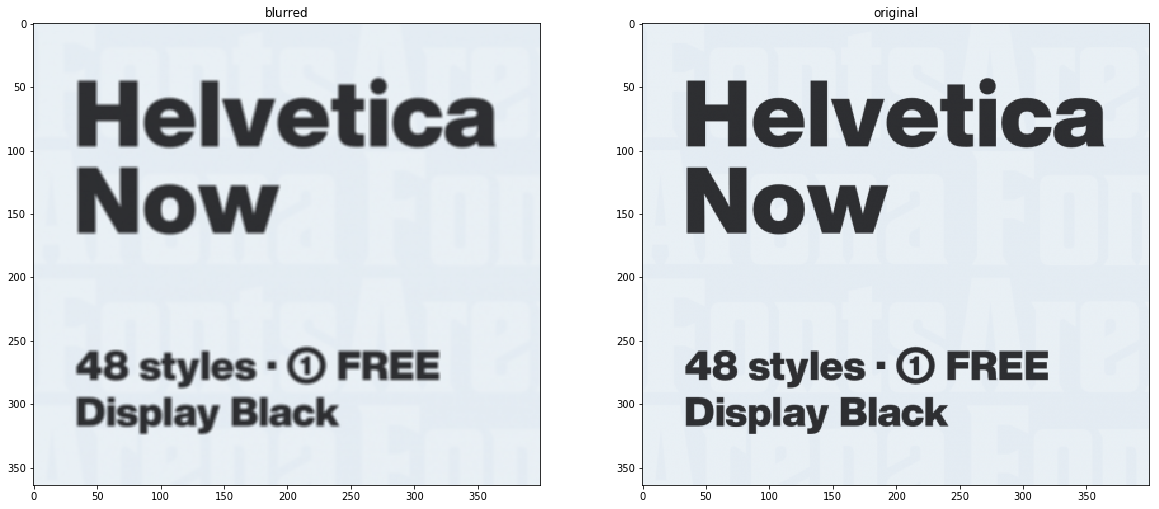

In [7]:
blurred = cv2.filter2D(image, -1, kernel_blur)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,20))
ax1.imshow(blurred)
ax1.set_title("blurred")
ax2.imshow(image)
ax2.set_title("original")



---


# 45 degrees edge kernel
---

We use ** [[-1, -1, 2], [-1,2,-1], [2, -1,-1]]** kernel for 45 degrees edge detection. As observed the diagonal has value 2 throughout, this will make the slant (45 degree aligned) images pop out when we go dark to light variation in the image.

Text(0.5, 1.0, 'original')

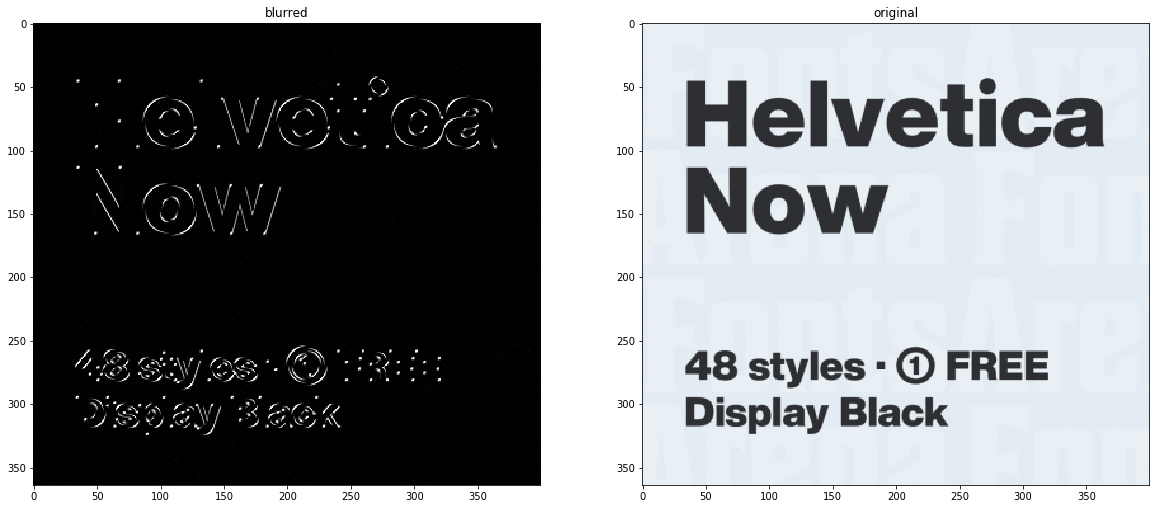

In [8]:
deg45 = cv2.filter2D(image, -1, kernel_45)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,20))
ax1.imshow(deg45)
ax1.set_title("blurred")
ax2.imshow(image)
ax2.set_title("original")



---


#  Identity kernel
---

We use **[[0, 0, 0], [0, 1, 0], [0, 0, 0]]** kernel as an identity kernel. When the identity kernel convolves over the image, each pixel value is preserved as only the central element is 1 in this case.

Text(0.5, 1.0, 'original image')

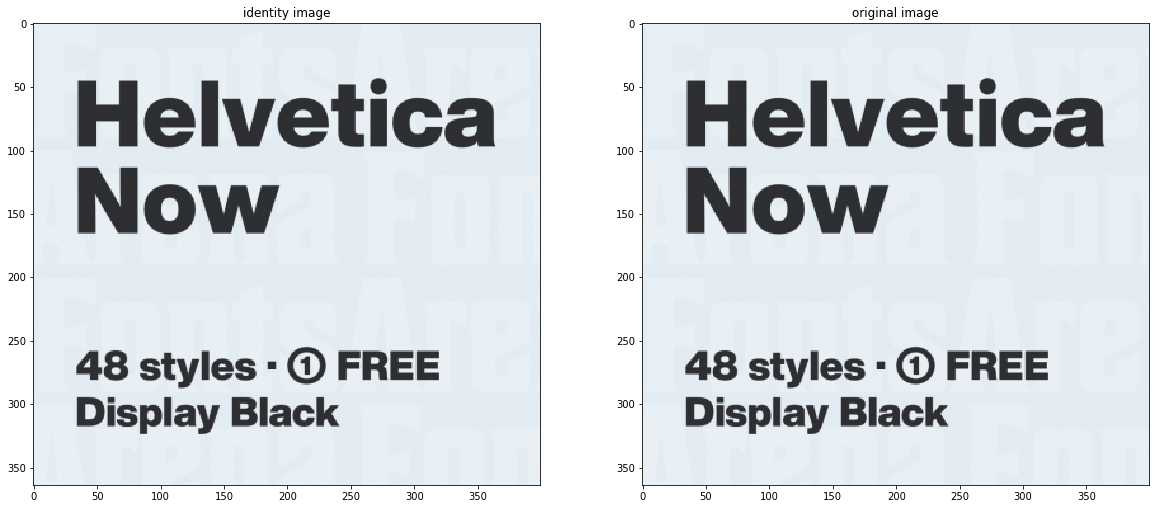

In [9]:
identity = cv2.filter2D(image, -1, kernel_identity)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,20))
ax1.imshow(identity)
ax1.set_title("identity image")
ax2.imshow(image)
ax2.set_title("original image")